y = a.x+b
y burada tahmin etmeye çalıştığımız bağımlı değişkendir
x bağımsız değişkendir
b, y kesme noktasıdır, yeni x 0 oldugunda y'nin değeridir.
a, x'teki bir birimlik değişiklik için y'deki değişikliği temsil eden doğrunun eğimidir.


Numpy ile Veri Oluşturma

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
x = 2 * np.random.rand(100,1) 
y = 3 * x + 4 + np.random.randn(100,1) #3x + 4

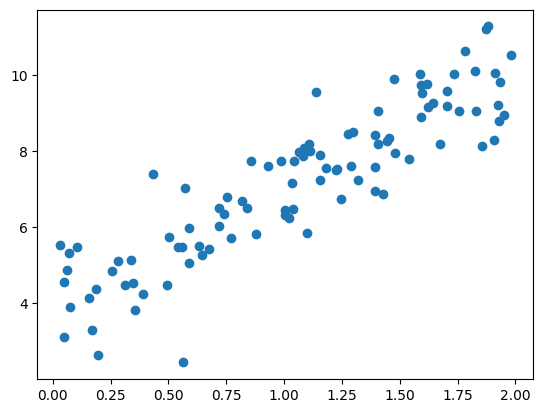

In [ ]:
plt.scatter(x, y, label='Data points' , color='blue')
plt.scatter(x,3 * x + 3, label="Equation", color='red')
plt.legend()
plt.show()

Numpy Verisetinde Sklearn Linear Regression